In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, multi_gpu_model

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [4]:
data_dir = 'data/'

In [5]:
train_data = np.load(path.join(data_dir, 'imagenet_6_class_train_data.npz'))
val_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))
test_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))

In [6]:
x_train = train_data['x_data']
y_train = train_data['y_data']
x_val = val_data['x_data']
y_val = val_data['y_data']
x_test = test_data['x_data']
y_test = test_data['y_data']
y_table_array = test_data['y_table_array']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table_array.shape

((4680, 341, 341, 3),
 (4680,),
 (1560, 341, 341, 3),
 (1560,),
 (1560, 341, 341, 3),
 (1560,),
 (6, 2))

In [7]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4680, 341, 341, 3),
 (4680, 6),
 (1560, 341, 341, 3),
 (1560, 6),
 (1560, 341, 341, 3),
 (1560, 6))

In [8]:
y_list = [text for _, text in y_table_array]
y_list

['bed', 'bird', 'cat', 'dog', 'house', 'tree']

In [9]:
input_shape = x_train[0].shape
output_size = len(y_list)

In [10]:
def build_2d_cnn_custom_ch_32_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=5, filters=32*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=3, strides=(3,3), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.75)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [11]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 341, 341, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 415872)            0         
_________________________________________________________________
dropout (Dropout)    

Train on 4680 samples, validate on 1560 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.5915 - acc: 0.3497
Epoch 00001: val_loss improved from inf to 1.31431, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/001-1.3143.hdf5
4680/4680 [==============================] - 19s 4ms/sample - loss: 1.5909 - acc: 0.3496 - val_loss: 1.3143 - val_acc: 0.5160
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.2506 - acc: 0.5235
Epoch 00002: val_loss improved from 1.31431 to 1.14875, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_2_conv_checkpoint/002-1.1487.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 1.2501 - acc: 0.5237 - val_loss: 1.1487 - val_acc: 0.5641
Epoch 3/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.0933 - acc: 0.6019
Epoch 00003: val_loss impr

Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4477 - acc: 0.8491
Epoch 00024: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.4479 - acc: 0.8489 - val_loss: 0.7647 - val_acc: 0.7372
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4465 - acc: 0.8497
Epoch 00025: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.4464 - acc: 0.8498 - val_loss: 0.7601 - val_acc: 0.7353
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4177 - acc: 0.8615
Epoch 00026: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.4185 - acc: 0.8611 - val_loss: 0.7859 - val_acc: 0.7314
Epoch 27/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.8525
Epoch 00027: val_loss did not improve from 0.75410
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.2064 - acc: 0.9300
Epoch 00054: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2067 - acc: 0.9299 - val_loss: 0.8784 - val_acc: 0.7372
Epoch 55/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2161 - acc: 0.9279
Epoch 00055: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2158 - acc: 0.9280 - val_loss: 0.8537 - val_acc: 0.7449
Epoch 56/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1879 - acc: 0.9416
Epoch 00056: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.1877 - acc: 0.9417 - val_loss: 0.8547 - val_acc: 0.7365
Epoch 57/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2038 - acc: 0.9317
Epoch 00057: val_loss did not improve from 0.75410
4680/4680 [==============================] - 16s 3m

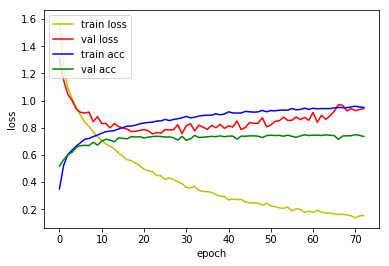

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.7398 - acc: 0.7513
Loss: 0.7398333268287854 Accuracy: 0.75128204

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.7479 - acc: 0.2423
Epoch 00001: val_loss improved from inf to 1.59961, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/001-1.5996.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 1.7477 - acc: 0.2427 - val_loss: 1.5996 - val_acc: 0.3833
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4590 - acc: 0.4212
Epoch 00002: val_loss improved from 1.59961 to 1.28607, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/002-1.2861.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 1.4594 - acc: 0.4209 - val_loss: 1.2861 - val_acc: 0.5269
Epoch 3/500
4672/4680 [==========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6638 - acc: 0.7699
Epoch 00023: val_loss improved from 0.70434 to 0.67298, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/023-0.6730.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.6630 - acc: 0.7703 - val_loss: 0.6730 - val_acc: 0.7679
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6495 - acc: 0.7791
Epoch 00024: val_loss did not improve from 0.67298
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.6491 - acc: 0.7793 - val_loss: 0.7108 - val_acc: 0.7468
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6496 - acc: 0.7703
Epoch 00025: val_loss improved from 0.67298 to 0.65666, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/025-0.6567.hdf5
4680/4680 [==============================] - 16s 3ms/sample - lo

Epoch 48/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4589 - acc: 0.8348
Epoch 00048: val_loss improved from 0.56217 to 0.54231, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/048-0.5423.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.4583 - acc: 0.8350 - val_loss: 0.5423 - val_acc: 0.8128
Epoch 49/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4387 - acc: 0.8497
Epoch 00049: val_loss improved from 0.54231 to 0.54041, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_3_conv_checkpoint/049-0.5404.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.4402 - acc: 0.8498 - val_loss: 0.5404 - val_acc: 0.8115
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4309 - acc: 0.8530
Epoch 00050: val_loss did not improve from 0.54041
4680/4680 [==============================] - 16s 3ms/sample - lo

Epoch 75/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3212 - acc: 0.8870
Epoch 00075: val_loss did not improve from 0.50668
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.3213 - acc: 0.8868 - val_loss: 0.5077 - val_acc: 0.8269
Epoch 76/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3234 - acc: 0.8891
Epoch 00076: val_loss did not improve from 0.50668
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.3232 - acc: 0.8893 - val_loss: 0.5320 - val_acc: 0.8244
Epoch 77/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3205 - acc: 0.8855
Epoch 00077: val_loss did not improve from 0.50668
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.3205 - acc: 0.8857 - val_loss: 0.5321 - val_acc: 0.8179
Epoch 78/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3057 - acc: 0.8943
Epoch 00078: val_loss did not improve from 0.50668
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.2405 - acc: 0.9148
Epoch 00104: val_loss did not improve from 0.50479
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2401 - acc: 0.9150 - val_loss: 0.5137 - val_acc: 0.8353
Epoch 105/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2465 - acc: 0.9129
Epoch 00105: val_loss did not improve from 0.50479
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2464 - acc: 0.9128 - val_loss: 0.5079 - val_acc: 0.8295
Epoch 106/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2489 - acc: 0.9077
Epoch 00106: val_loss did not improve from 0.50479
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2491 - acc: 0.9077 - val_loss: 0.5459 - val_acc: 0.8212
Epoch 107/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2323 - acc: 0.9202
Epoch 00107: val_loss did not improve from 0.50479
4680/4680 [==============================] - 16s

Epoch 134/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1852 - acc: 0.9339
Epoch 00134: val_loss did not improve from 0.50241
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.1857 - acc: 0.9338 - val_loss: 0.5216 - val_acc: 0.8353
Epoch 135/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1804 - acc: 0.9330
Epoch 00135: val_loss did not improve from 0.50241
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.1804 - acc: 0.9329 - val_loss: 0.5123 - val_acc: 0.8340
Epoch 136/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1801 - acc: 0.9364
Epoch 00136: val_loss did not improve from 0.50241
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.1808 - acc: 0.9363 - val_loss: 0.5091 - val_acc: 0.8397
Epoch 137/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1802 - acc: 0.9364
Epoch 00137: val_loss did not improve from 0.50241
4680/4680 [=======================

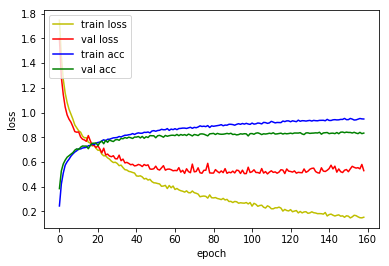

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.5024 - acc: 0.8282
Loss: 0.502409255810273 Accuracy: 0.8282051

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.7415 - acc: 0.2468
Epoch 00001: val_loss improved from inf to 1.56497, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/001-1.5650.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 1.7412 - acc: 0.2476 - val_loss: 1.5650 - val_acc: 0.4346
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4840 - acc: 0.3838
Epoch 00002: val_loss improved from 1.56497 to 1.31791, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/002-1.3179.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 1.4839 - acc: 0.3838 - val_loss: 1.3179 - val_acc: 0.4840
Epoch 3/500
4672/4680 [============

4672/4680 [============================>.] - ETA: 0s - loss: 0.8339 - acc: 0.7001
Epoch 00023: val_loss improved from 0.77309 to 0.76955, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/023-0.7695.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.8341 - acc: 0.7000 - val_loss: 0.7695 - val_acc: 0.7237
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.7660 - acc: 0.7226
Epoch 00024: val_loss improved from 0.76955 to 0.70988, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/024-0.7099.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.7671 - acc: 0.7222 - val_loss: 0.7099 - val_acc: 0.7455
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.7470 - acc: 0.7361
Epoch 00025: val_loss improved from 0.70988 to 0.67588, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_3

Epoch 48/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5330 - acc: 0.8084
Epoch 00048: val_loss did not improve from 0.55505
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.5341 - acc: 0.8083 - val_loss: 0.6230 - val_acc: 0.7782
Epoch 49/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5237 - acc: 0.8157
Epoch 00049: val_loss improved from 0.55505 to 0.55113, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/049-0.5511.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.5232 - acc: 0.8160 - val_loss: 0.5511 - val_acc: 0.7974
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5305 - acc: 0.8082
Epoch 00050: val_loss improved from 0.55113 to 0.52920, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/050-0.5292.hdf5
4680/4680 [==============================] - 16s 3ms/sample - lo

4672/4680 [============================>.] - ETA: 0s - loss: 0.4112 - acc: 0.8553
Epoch 00074: val_loss did not improve from 0.45468
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.4113 - acc: 0.8553 - val_loss: 0.5358 - val_acc: 0.8051
Epoch 75/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4051 - acc: 0.8583
Epoch 00075: val_loss did not improve from 0.45468
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.4053 - acc: 0.8583 - val_loss: 0.4667 - val_acc: 0.8301
Epoch 76/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3764 - acc: 0.8654
Epoch 00076: val_loss did not improve from 0.45468
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.3767 - acc: 0.8652 - val_loss: 0.4759 - val_acc: 0.8346
Epoch 77/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3969 - acc: 0.8583
Epoch 00077: val_loss did not improve from 0.45468
4680/4680 [==============================] - 17s 4m

Epoch 102/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3146 - acc: 0.8881
Epoch 00102: val_loss improved from 0.41879 to 0.41679, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_4_conv_checkpoint/102-0.4168.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.3142 - acc: 0.8882 - val_loss: 0.4168 - val_acc: 0.8603
Epoch 103/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3027 - acc: 0.8923
Epoch 00103: val_loss did not improve from 0.41679
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.3024 - acc: 0.8925 - val_loss: 0.4365 - val_acc: 0.8551
Epoch 104/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3063 - acc: 0.8919
Epoch 00104: val_loss did not improve from 0.41679
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.3061 - acc: 0.8921 - val_loss: 0.4417 - val_acc: 0.8449
Epoch 105/500
4672/4680 [============================>.] -

Epoch 131/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2494 - acc: 0.9118
Epoch 00131: val_loss did not improve from 0.40558
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.2491 - acc: 0.9120 - val_loss: 0.4423 - val_acc: 0.8481
Epoch 132/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2410 - acc: 0.9148
Epoch 00132: val_loss did not improve from 0.40558
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.2412 - acc: 0.9150 - val_loss: 0.4414 - val_acc: 0.8494
Epoch 133/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2500 - acc: 0.9118
Epoch 00133: val_loss did not improve from 0.40558
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.2498 - acc: 0.9118 - val_loss: 0.4415 - val_acc: 0.8481
Epoch 134/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2209 - acc: 0.9236
Epoch 00134: val_loss did not improve from 0.40558
4680/4680 [=======================

4672/4680 [============================>.] - ETA: 0s - loss: 0.1844 - acc: 0.9396
Epoch 00159: val_loss did not improve from 0.39511
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.1841 - acc: 0.9397 - val_loss: 0.4268 - val_acc: 0.8571
Epoch 160/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2020 - acc: 0.9274
Epoch 00160: val_loss did not improve from 0.39511
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2016 - acc: 0.9276 - val_loss: 0.4721 - val_acc: 0.8532
Epoch 161/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1868 - acc: 0.9366
Epoch 00161: val_loss did not improve from 0.39511
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.1866 - acc: 0.9368 - val_loss: 0.4657 - val_acc: 0.8494
Epoch 162/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1765 - acc: 0.9375
Epoch 00162: val_loss did not improve from 0.39511
4680/4680 [==============================] - 16s

4672/4680 [============================>.] - ETA: 0s - loss: 0.1493 - acc: 0.9473
Epoch 00189: val_loss did not improve from 0.39511
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.1492 - acc: 0.9474 - val_loss: 0.4086 - val_acc: 0.8763
Epoch 190/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1423 - acc: 0.9491
Epoch 00190: val_loss did not improve from 0.39511
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.1423 - acc: 0.9491 - val_loss: 0.3962 - val_acc: 0.8763
Epoch 191/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1372 - acc: 0.9486
Epoch 00191: val_loss did not improve from 0.39511
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.1374 - acc: 0.9485 - val_loss: 0.4414 - val_acc: 0.8647
Epoch 192/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1727 - acc: 0.9411
Epoch 00192: val_loss did not improve from 0.39511
4680/4680 [==============================] - 17s

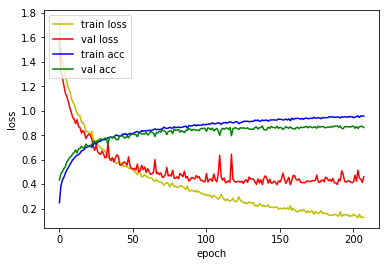

1560/1560 [==============================] - 4s 2ms/sample - loss: 0.3951 - acc: 0.8686
Loss: 0.3951078218527329 Accuracy: 0.86858976

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.7113 - acc: 0.2583
Epoch 00001: val_loss improved from inf to 1.49941, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_5_conv_checkpoint/001-1.4994.hdf5
4680/4680 [==============================] - 18s 4ms/sample - loss: 1.7108 - acc: 0.2588 - val_loss: 1.4994 - val_acc: 0.4026
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4652 - acc: 0.4018
Epoch 00002: val_loss improved from 1.49941 to 1.33362, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_5_conv_checkpoint/002-1.3336.hdf5
4680/4680 [==============================] - 16s 4ms/sample - loss: 1.4649 - acc: 0.4013 - val_loss: 1.3336 - val_acc: 0.4859
Epoch 3/500
4672/4680 [==========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6611 - acc: 0.7735
Epoch 00023: val_loss improved from 0.68149 to 0.64114, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_5_conv_checkpoint/023-0.6411.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.6610 - acc: 0.7735 - val_loss: 0.6411 - val_acc: 0.7699
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6415 - acc: 0.7735
Epoch 00024: val_loss did not improve from 0.64114
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.6416 - acc: 0.7737 - val_loss: 0.6982 - val_acc: 0.7494
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6603 - acc: 0.7665
Epoch 00025: val_loss did not improve from 0.64114
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.6600 - acc: 0.7669 - val_loss: 0.6478 - val_acc: 0.7699
Epoch 26/500
4672/4680 [============================>.] - ETA

Epoch 49/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4105 - acc: 0.8508
Epoch 00049: val_loss did not improve from 0.49895
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.4109 - acc: 0.8506 - val_loss: 0.5228 - val_acc: 0.8147
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8647
Epoch 00050: val_loss did not improve from 0.49895
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.3943 - acc: 0.8647 - val_loss: 0.5700 - val_acc: 0.7929
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3910 - acc: 0.8570
Epoch 00051: val_loss did not improve from 0.49895
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.3908 - acc: 0.8573 - val_loss: 0.5049 - val_acc: 0.8160
Epoch 52/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3884 - acc: 0.8632
Epoch 00052: val_loss did not improve from 0.49895
4680/4680 [===========================

Epoch 77/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2282 - acc: 0.9174
Epoch 00077: val_loss did not improve from 0.46759
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.2279 - acc: 0.9175 - val_loss: 0.4760 - val_acc: 0.8333
Epoch 78/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2317 - acc: 0.9204
Epoch 00078: val_loss did not improve from 0.46759
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.2318 - acc: 0.9203 - val_loss: 0.5091 - val_acc: 0.8282
Epoch 79/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2264 - acc: 0.9206
Epoch 00079: val_loss did not improve from 0.46759
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.2268 - acc: 0.9205 - val_loss: 0.5062 - val_acc: 0.8212
Epoch 80/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2135 - acc: 0.9255
Epoch 00080: val_loss did not improve from 0.46759
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.1206 - acc: 0.9570
Epoch 00107: val_loss did not improve from 0.46759
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.1205 - acc: 0.9571 - val_loss: 0.5482 - val_acc: 0.8378
Epoch 108/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1218 - acc: 0.9595
Epoch 00108: val_loss did not improve from 0.46759
4680/4680 [==============================] - 17s 4ms/sample - loss: 0.1216 - acc: 0.9596 - val_loss: 0.5525 - val_acc: 0.8378
Epoch 109/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1206 - acc: 0.9561
Epoch 00109: val_loss did not improve from 0.46759
4680/4680 [==============================] - 16s 4ms/sample - loss: 0.1209 - acc: 0.9560 - val_loss: 0.5248 - val_acc: 0.8410
Epoch 110/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1286 - acc: 0.9576
Epoch 00110: val_loss did not improve from 0.46759
4680/4680 [==============================] - 17s

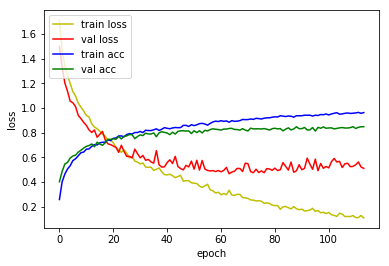

1560/1560 [==============================] - 4s 2ms/sample - loss: 0.4676 - acc: 0.8340
Loss: 0.46759488979975383 Accuracy: 0.83397436



In [12]:
for i in range(2, 6):
    base = 'vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
#     model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [13]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(2, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 4s 2ms/sample - loss: 0.4676 - acc: 0.8340
Loss: 0.46759488979975383 Accuracy: 0.83397436


In [14]:
for i in range(2, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_075_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 4s 2ms/sample - loss: 0.5108 - acc: 0.8487
Loss: 0.5108203684672331 Accuracy: 0.8487179
